# Análisis de Datos en Recursos Humanos Colsubsidio

Un alto porcentaje de las compañías tiende a establecer categorías en donde enmarcar a sus empleados, clientes, etc. Estas categorías permiten diferenciar fácilmente a las personas situadas en ellas, facilitando su identificación, generalidades del grupo, características en común, etc. En ocasiones ubicar a una persona en una categoría puede ser difícil, ya que puede aplicar a más de una, esto obliga a que muchas veces este procedimiento se haga manual, siendo largo y tortuoso. 

Para el caso particular de la compañía Colsubsidio. Establecer a sus empleados en categorías es una tarea escencial del área de recursos humanos. Ya que en base a estas categorías, sus empleados reciben beneficios específicos. Actualmente éste proceso lo realiza manualmente un experto del área, haciendo de esta tarea algo tedioso y difícil cuando el número de empleados a clasificar es elevado.

### Objetivo:

Automatizar la clasificación de empleados de Colsubsidio según sus características, en las categorías previamente establecidas por la compañía.


In [1]:
#All imports

import warnings
import pandas as pd
import numpy as np
import pydotplus

from datetime import datetime, date, time, timedelta
from IPython.core.pylabtools import figsize

from src.Preprocessing.Preprocessing import Preprocess
from src.Preprocessing.Discretizing import Discretize
from src.Association.Association import Association
from src.Clustering.Kmodes import Kmodes
from src.Classifying.Runner import Runner

figsize(14, 5)

warnings.filterwarnings('ignore')

file = 'files/database.csv'
dataset = pd.read_csv(file, index_col=False, header=0, delimiter="\t")

print dataset

print "La longitud del conjunto de datos es de", dataset.shape[0], "filas y", dataset.shape[1], "columnas."

C:\Users\Jonathan\Anaconda2\lib\site-packages\sklearn\cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


          ID                                    CARGO FECHA INICIO POSESION  \
0       5607    MEDICO CIRUJANO PEDIATRA HOSPITALARIO            29/05/2013   
1       5611    MEDICO CIRUJANO PEDIATRA HOSPITALARIO            29/05/2013   
2       5643    MEDICO CIRUJANO PEDIATRA HOSPITALARIO            29/05/2013   
3       6075    MEDICO CIRUJANO PEDIATRA HOSPITALARIO            29/05/2013   
4       8440    MEDICO CIRUJANO PEDIATRA HOSPITALARIO            29/05/2013   
5       3513        MEDICO ESPECIALISTA HEMATONCOLOGO            15/07/2010   
6       4626        MEDICO ESPECIALISTA HEMATONCOLOGO            19/08/2008   
7       3977        MEDICO ESPECIALISTA HEMATONCOLOGO            15/07/2010   
8      11486     GERENTE PROYECTO ALIMENTOS Y BEBIDAS            28/09/2016   
9       7357                        AUXILIAR MERCADEO             1/01/1960   
10      5727                         AUXILIAR EMPAQUE            17/01/2008   
11      3039                        AUXILIAR COCINA 

## Preprocesamiento.

#### Modulo de preprocesamiento.
Este modulo es usado para reemplazar valores faltantes usando la media de los datos. También se borran las variables que consideramos no eran de utilidad ya que no aportaban información o eran redundantes con otras.


In [2]:
preprocess = Preprocess( dataset )
dataset = preprocess.preprocessFile()

PREPROCESSING MODULE 


Finding Minimum Wages
Replacing missing data in FECHA INICIO POSESION
Replacing missing data in PRIMERA ALTA
Replacing missing data in FECHA EXPIRACION CONTRATO
Replacing missing data in TURNO
Replacing missing data in HORARIO TRABAJO
Replacing missing data in CENTRO DE COSTE
Replacing missing data in TIPO DE PACTO ESPECIFICO
Deleting variables tat we consider useless ['ID', 'FECHA DE NACIMIENTO', 'SALARIO', 'SUELDO TEXTO', 'HORAS SEMANALES', 'HORAS DIARIAS', 'FIN', 'SALARIO A 240', 'PRIMERA ALTA', 'CARGO', 'FECHA EXPIRACION CONTRATO']
La longitud del conjunto de datos es de 12394 filas y 24 columnas.


#### Discretización


DISCRETIZE MODULE 


EDAD DEL EMPLEADO


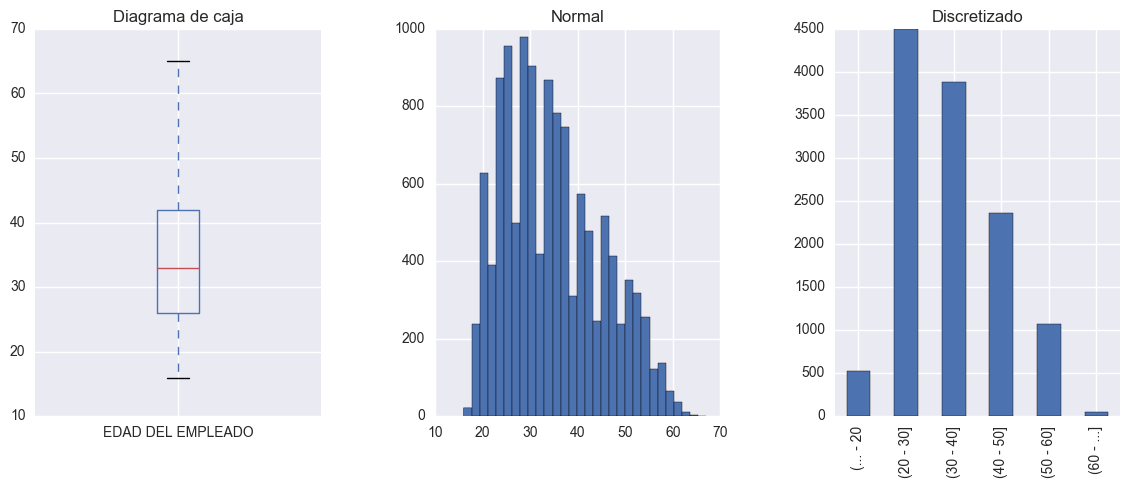

SALARIOS MINIMOS
29.49 0.03


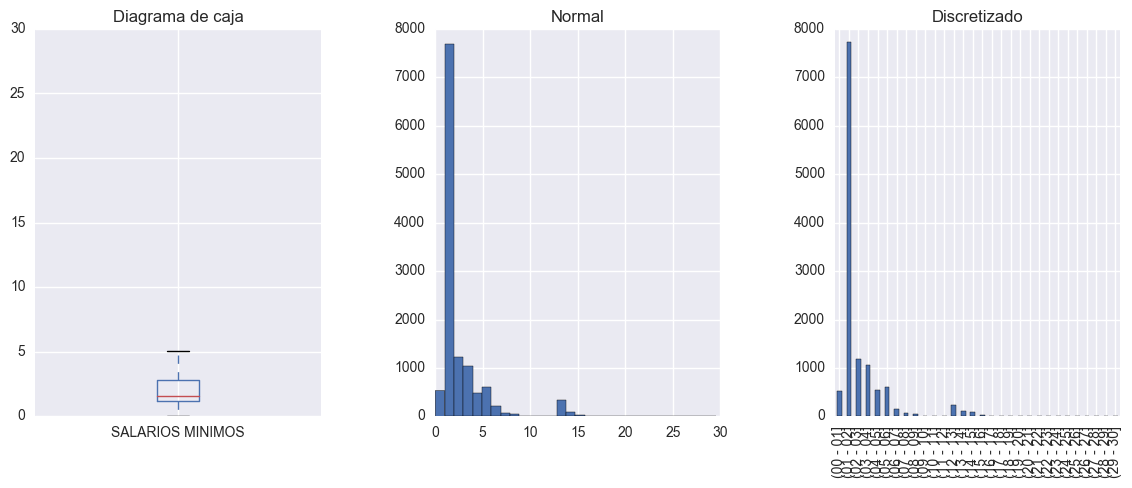

HORAS AL MES


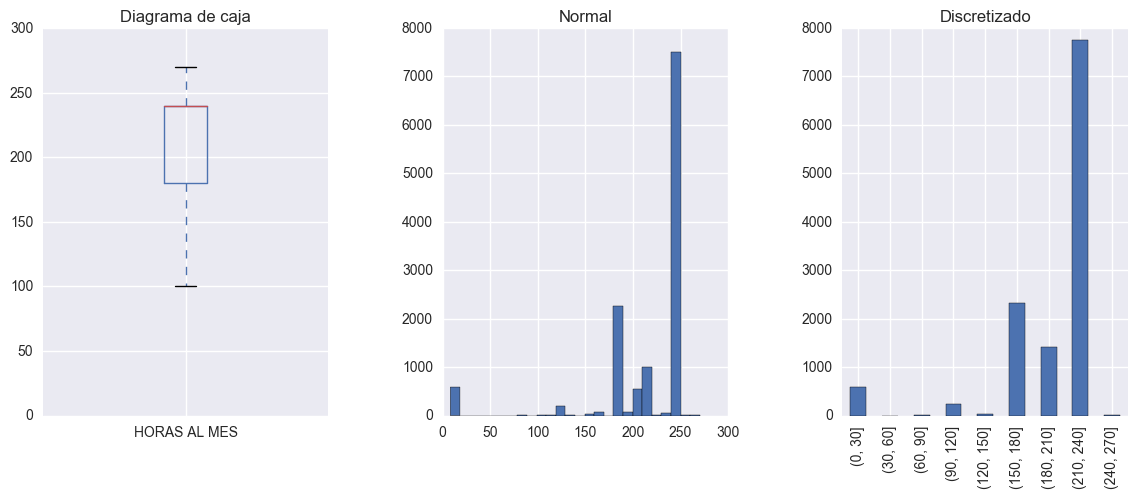

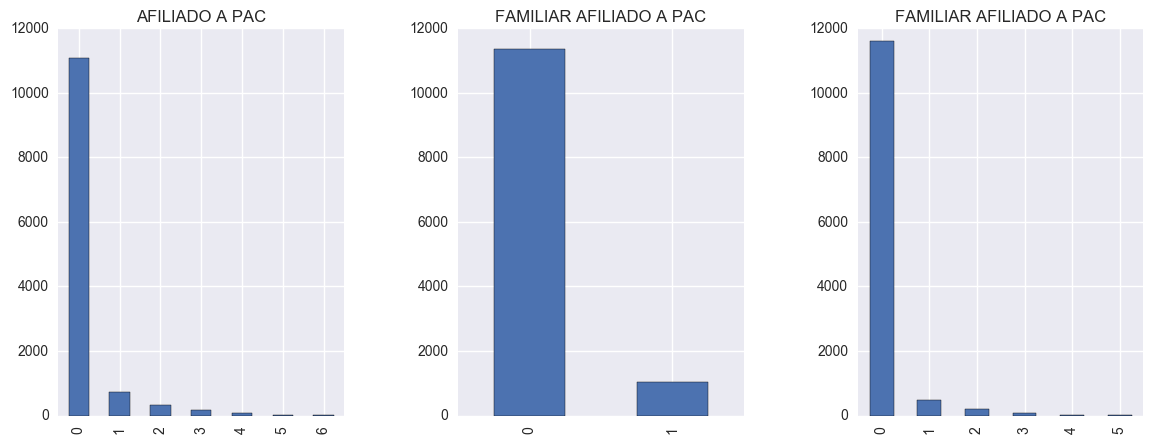

In [3]:
plotting = True #False to disable plotting
discretize = Discretize( dataset, True )
dataset = discretize.discretizeFile()

## Asociación

Para el módulo de asociación se utilizó Weka. Mediante un wrapper de Java a Python se lograron utilizar las herramientas que provee este framework.

In [4]:
association = Association( dataset )
keys = ["HORAS AL MES", "DIVISION", "AREA DE PERSONAL", "SEXO", "EDAD DEL EMPLEADO", "SALARIOS MINIMOS", "CATEGORIA"]

DEBUG:weka.core.jvm:Adding bundled jars
DEBUG:weka.core.jvm:Classpath=['C:\\Users\\Jonathan\\Anaconda2\\lib\\site-packages\\javabridge\\jars\\rhino-1.7R4.jar', 'C:\\Users\\Jonathan\\Anaconda2\\lib\\site-packages\\javabridge\\jars\\runnablequeue.jar', 'C:\\Users\\Jonathan\\Anaconda2\\lib\\site-packages\\javabridge\\jars\\cpython.jar', 'C:\\Users\\Jonathan\\Anaconda2\\lib\\site-packages\\weka\\lib\\python-weka-wrapper.jar', 'C:\\Users\\Jonathan\\Anaconda2\\lib\\site-packages\\weka\\lib\\weka.jar']
DEBUG:weka.core.jvm:MaxHeapSize=default
DEBUG:weka.core.jvm:Package support disabled
DEBUG:javabridge.jutil:Creating JVM object
DEBUG:javabridge.jutil:Signalling caller


In [5]:
association.apriori(keys, confidence=0.7)


Apriori

Minimum support: 0.4 (4958 instances)
Minimum metric <confidence>: 0.7
Number of cycles performed: 12

Generated sets of large itemsets:

Size of set of large itemsets L(1): 5

Size of set of large itemsets L(2): 5

Best rules found:

 1. AREA DE PERSONAL=AUXILIAR 5303 ==> SALARIOS MINIMOS=(01 - 02] 5144    <conf:(0.97)> lift:(1.56) lev:(0.15) [1839] conv:(12.49)
 2. CATEGORIA=Joven 7570 ==> SALARIOS MINIMOS=(01 - 02] 5520    <conf:(0.73)> lift:(1.17) lev:(0.06) [802] conv:(1.39)
 3. SALARIOS MINIMOS=(01 - 02] 7723 ==> CATEGORIA=Joven 5520    <conf:(0.71)> lift:(1.17) lev:(0.06) [802] conv:(1.36)
 4. SALARIOS MINIMOS=(01 - 02] 7723 ==> SEXO=Femenino 5432    <conf:(0.7)> lift:(1.01) lev:(0.01) [77] conv:(1.03)



In [6]:
association.filteredApriori(keys, confidence=0.7)

FilteredAssociator using weka.associations.Apriori -N 10 -T 0 -C 0.9 -D 0.05 -U 1.0 -M 0.1 -S -1.0 -c -1 on data filtered through weka.filters.AllFilter 

Filtered Header
@relation weka-weka.filters.AllFilter

@attribute 'HORAS AL MES' {'(180, 210]','(150, 180]','(210, 240]','(120, 150]','(90, 120]','(0, 30]','(240, 270]','(60, 90]'}
@attribute DIVISION {'SALUD IPS',ADMINISTRACION,SUPERMERCADOS,'RECREACION Y TURISMO',DROGUERIAS,EDUCACION,'CREDITO SOCIAL',VIVIENDA,FOSFEC}
@attribute 'AREA DE PERSONAL' {ESPECIALISTA,GERENTE,AUXILIAR,ASESOR,'SENA LECTIVO','DOCENTES GJC','SENA PRODUCTIVO','ADMON CORPORACION','DOCENTES BAC','CORP DOCENTES HORAS.','PENSIONADOS ACTIVOS','PERSONAL ALTO RIESGO',BACTERIOLOGO,PSICOLOGO,MEDICO,CAJERO,INSTRUCTOR,ADMINISTRADOR,CAMILLERO,TECNICO,INSTRUMENTADOR,ENFERMERA,OPERADOR,TERAPISTA,JEFES,SUPERVISOR,RECIBIDOR,COORDINADOR,MONITOR,PROMOTOR,'INTERM  DOM Y FEST','INTER  SABDOM Y FEST',VIGILANTE,ORTODONCISTA,PERIODONCISTA,ODONTOLOGO,'TRABAJADOR SOCIAL',HISTOTECNISTA

## Agrupación

## Clasificación

Para la parte de clasificación se implementaron los clasificadoress de Naive Bayes, Árboles de decisión, Redes neuronales, Support Vector Machine y K Nearest Neighbors. 

Se monstrará una tabla comparativa entre las curva ROC y las matrices de confusión.

In [ ]:
classifier = Runner(dataset)
classifier.runClassifiers()

BERNOULLI NAIVE BAYES
Accuracy for Gini is: 69.5518772709
[[ 454   11   10]
 [ 159 6903  508]
 [   9 3074 1257]]
             precision    recall  f1-score   support

          0       0.73      0.96      0.83       475
          1       0.69      0.91      0.79      7570
          2       0.71      0.29      0.41      4340

avg / total       0.70      0.70      0.66     12385

DECISION TREE
Accuracy for Gini is: 88.5748889786
[[ 458    8    9]
 [   6 6425 1139]
 [   0  253 4087]]
             precision    recall  f1-score   support

          0       0.99      0.96      0.98       475
          1       0.96      0.85      0.90      7570
          2       0.78      0.94      0.85      4340

avg / total       0.90      0.89      0.89     12385

Accuracy for Entropy is: 93.9765845781
[[ 458    8    9]
 [   6 7094  470]
 [   0  253 4087]]
             precision    recall  f1-score   support

          0       0.99      0.96      0.98       475
          1       0.96      0.94      0.95   